# Instructions

**Using Python (Jupyter Note), solve the following problems.**

1.  **Upload the .ipyjn file (practice3_name_student.ipynb)**

2.  **Write an individual report including and explaining the results of
    the computation and the plots of the figures.**


## GPS Data Analysis using NMEA

NMEA 0183 is a proprietary protocol issued by the National Marine Electronics Association for use in boat navigation and control systems. Because early GPS sensors were designed for compatibility with these systems, GPS reporting protocols are often a small subset of NMEA 0183 or mutated from such as subset. AIS, the Marine Automatic Identification system, also uses NMEA0183-like packet formats.

A detailed description of the NMEA packets can be found in:

* http://www2.etown.edu/wunderbot/DOWNLOAD/AgGPS114/NMEA_Messages_RevA_Guide_ENG.pdf

## GPS Log Records

***Using the logfile "p1.txt" solve the following problems***

*Note: In case you have recorded a valid LogFile, including a significant number of fixes, you can use your own data*




In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
infile = open("p1.txt", "r")


## Problem 1: Accuracy Analysis


Even if the GPS antenna is at a fixed position, due to the limited precision of the GPS the position fix will vary with time. Find in the data in the recorded file the successive position fixes (message GGA)


**1. What it the time interval between sucessive valid fixes?**

We use the messages GPRMC, these will be fixed if it has the value A in the third attribute.

The requested interval is the difference in time between two consecutive fixes.

In [4]:
infile = open("p1.txt", "r")
x=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A":
      GPS=float(valorGPS[1]) #We store the time value 
      x.append(GPS)#we use append to save it without deleting previous values
       
intervalo = x[1]-x[0]
print(f'{intervalo}: in UTC time in hours, minutes and seconds.')

1.0: in UTC time in hours, minutes and seconds.


**2a. Plot in a 2D graph with latitude in the ordinates and longitude in the abscissass and a point for each position fix. Label the axes.**

That we do now is to store in a variable the latitude and in another one the longitude and then represent it


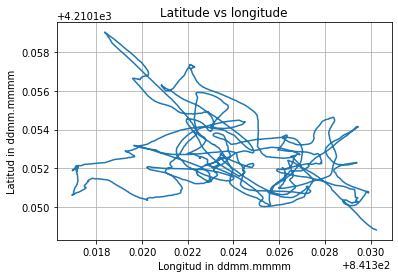

In [5]:
infile = open("p1.txt", "r")
lat=[]
lon=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": #to check that it is fix as before
             latitud = float(valorGPS[3]) #we calculate the latitude
             lat.append(latitud)
             if valorGPS[4]=="S":
                    latitud = - latitud #if the orientation is south and not north
                    lat.append(latitud)
             longitud = float(valorGPS[5])#the longitude
             lon.append(longitud)
             if valorGPS[6] == "E":
                     longitud= - longitud #if the orientation is east and not west
                     lon.append(longitud)          
            
fig, ax = plt.subplots()
ax.plot(lon, lat)
plt.xlabel('Longitud in ddmm.mmmm')
plt.ylabel('Latitud in ddmm.mmmm')
plt.title("Latitude vs longitude")
plt.grid()
plt.show()

**2b. Plot in a 2D graph with time in the abcissas and latitude in the abscissass and a point for each position fix. Label the axes.**

Now we will do the same but with time and latitude.

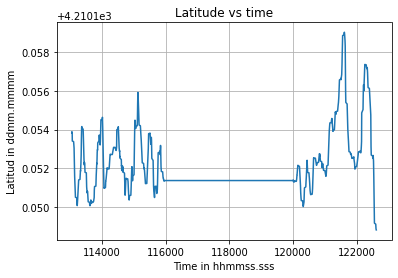

In [6]:
infile = open("p1.txt", "r")
lat=[]
tim=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             latitud = float(valorGPS[3]) #calculamos la latitud
             lat.append(latitud)
             if valorGPS[4]=="S":
                    latitud = - latitud #esto es por si es sur en vez de norte la orientacion
                    lat.append(latitud)
             tiempo = float(valorGPS[1])#ahora el tiempo
             tim.append(tiempo)
          
fig, ax = plt.subplots()
ax.plot(tim,lat)
plt.xlabel('Time in hhmmss.sss')
plt.ylabel('Latitud in ddmm.mmmm')
plt.title("Latitude vs time")
plt.grid()
plt.show()

**2c. Plot in a 2D graph with time in the abcissas and longitude in the abscissass and a point for each position fix. Label the axes.**

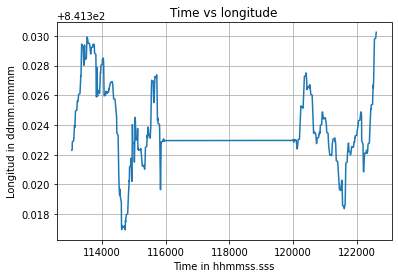

In [7]:
infile = open("p1.txt", "r")
tim=[]
lon=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             
             longitud = float(valorGPS[5])#la longitud
             lon.append(longitud)
             if valorGPS[6] == "E":
                     longitud= - longitud #por si la orientación es este en vez de oeste q es lo normal
                     lon.append(longitud)  
             tiempo = float(valorGPS[1])#ahora el tiempo
             tim.append(tiempo)        
            
fig, ax = plt.subplots()
ax.plot(tim, lon)
plt.ylabel('Longitud in ddmm.mmmm')
plt.xlabel('Time in hhmmss.sss')
plt.title("Time vs longitude")
plt.grid()
plt.show()

**3. ¿What is the mean position?**

To calculate the mean position we create a variable with the latitude and another one with the longitude and average each one separately

In [8]:
infile = open("p1.txt", "r")
lat=[]
lon=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             latitud = float(valorGPS[3]) #calculamos la latitud
             lat.append(latitud)
             if valorGPS[4]=="S":
                    latitud = - latitud #esto es por si es sur en vez de norte la orientacion
                    lat.append(latitud)
             longitud = float(valorGPS[5])#ahora la longitud
             lon.append(longitud)
             if valorGPS[6] == "E":
                     longitud= - longitud #por si la orientación es este en vez de oeste q es lo normal
                     lon.append(longitud) 
np.mean(lat)#asi hacemos la media de la latitud
np.mean(lon)#y así de la longitud
print(f'The mean position has a latitude of : {lat[0]}ddmm.mmmm and a longitude of {lon[0]}ddmm.mmmm .') 

The mean position has a latitude of : 4210.15389ddmm.mmmm and a longitude of 841.32229ddmm.mmmm .


**4. Plot the same data as deviation, in meters, respect to the mean position. Label the axes. Explain clearly how did you convert degrees, minutes, seconds to meters**

First, we calculate the mean position as before, but in meters.

To convert from degrees to meters we use the following formula:

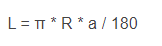

being, the longitude in meteres, R the radius of the circle (the earth, Rearth=6.370km), 'a' the radius of the circle.

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

infile = open("p1.txt", "r")
lat=[]
lon=[]
Rearth= 6370000
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             latitud = float(valorGPS[3]) #calculamos la latitud
             #ahora así no llega, hay que pasar los datos a metros    
             latgrados= float(latitud/100)          
             latmetros = np.pi*Rearth*latgrados/180
             lat.append(latmetros)
           
             longitud = float(valorGPS[5])#ahora la longitud, hacemos lo mismo
             longrados=float(longitud/100)
             
             lonmetros=longrados*np.pi*Rearth/180
             lon.append(lonmetros)
            
np.mean(lat)#asi hacemos la media de la latitud
np.mean(lon)#y así de la longitud
print(f'La posición media tiene una latitud de: {lat[0]:.4f} metros y una longitud de {lon[0]:.4f} metros .') 

La posición media tiene una latitud de: 4680742.7191 metros y una longitud de 935360.8648 metros .


Now we calculate the longitude and latitude as before, but taking into account its deviation, for this we use haversine

In [14]:
!pip install haversine #necestiamos instalar esta libreria para hallar la desviación

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


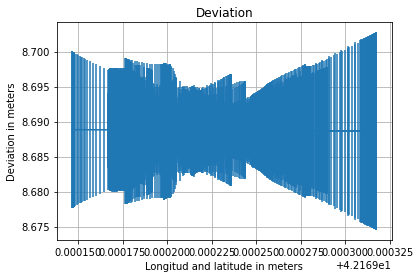

In [15]:
import haversine as hs
infile = open("p1.txt", "r")
lat=[]
lon=[]
desviacion=[]

for i in infile: #este bucle es solo para calcular las mean position esta vez
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             latitud = float(valorGPS[3]) #calculamos la latitud
             latgrados= int(latitud/100)
             latminimo= latitud-latgrados*100
             latfinal = latgrados + latminimo/60
             lat.append(latfinal)
              
             longitud = float(valorGPS[5])#ahora la longitud, hacemos lo mismo
             longrados=int(longitud/100)
             lonminimo=longitud-longrados*100
             lonfinal=longrados+lonminimo/60
             lon.append(lonfinal)
             
             
x=np.mean(lat)#mean position de la latitud
y=np.mean(lon)#mean position de la longitud
z=(x,y)#las dos mean position juntas
#ahora calculamos la desviación
for i in range(len(lat)):
  cordenada=(lat[i],lon[i])
  desviacion.append(hs.haversine(z,cordenada))

#ahora hacemos el dibujo con la longitud, la latitud y la desviación calculada


plt.errorbar(lat,lon,desviacion)
plt.xlabel('Longitud and latitude in meters')
plt.ylabel('Deviation in meters')
plt.title("Deviation")
plt.grid()
plt.show()

**5. Plot the circumferences centred in the mean position containing 67% and 95% of the position fixes. Label the axes. (The circumferences should look like that in the plot, and not like ellipses) Indicate the circumference radius (in meters). Clearly explain how you have calculated these radius. ¿what is the meaning of those radii?**

For this exercise we convert the latitude and longitude values we are going to use from degrees to meters.

Then, we calculate the modulus of latitude, longitude and mean position.

Then, we will subtract from each value (of the module) of the latitude and longitude the mean position, in order to know how far this point is from the mean position.

Then, we will store in a variable, the 67 percent(95 percent in the second case) of the samples that are closest to the average position, within these samples, the one that is greater, will be the distance (in meters) that we will use for the radius.

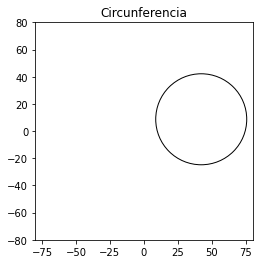

In [19]:
import haversine as hs
infile = open("p1.txt", "r")
lat=[]
lon=[]
desviacion=[]
modulofinal=[]
muestras67=[]
Rearth=6370000

for i in infile: #este bucle es solo para calcular las mean position esta vez
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             latitud = float(valorGPS[3]) #calculamos la latitud
             latgrados= int(latitud/100)
             latminimo= latitud-latgrados*100
             latfinal = latgrados + latminimo/60
             lat.append(latfinal)
              
             longitud = float(valorGPS[5])#ahora la longitud, hacemos lo mismo
             longrados=int(longitud/100)
             lonminimo=longitud-longrados*100
             lonfinal=longrados+lonminimo/60
             lon.append(lonfinal)
             
             
x=np.mean(lat)#mean position de la latitud
y=np.mean(lon)#mean position de la longitud
z=(x,y)#las dos mean position juntas
#ahora calculamos la desviación
for i in range(len(lat)):
  cordenada=(lat[i],lon[i])
  h=cordenada-x#vemos la diferencia entre cada punto y la media
  moduloh= (((h[0])**2 + (h[1]**2))**0.5)
  modulofinal.append(moduloh)
  #h.append(hf)
  #ahora calcularemos los puntos de esto que mas lejos estan de la media , esos son los que quedan fuera del circulo

lenmodulo=len(modulofinal)
ayuda=int(0.67*lenmodulo)

for i in range(ayuda):#hacemos un bucle con a longitud del 67 por ciento de las muestras, que serán los que nos quedemos
   minimo= min(modulofinal)
   modulofinal.remove(minimo)
   muestras67.append(minimo)#en este vector estan el 67 por ciento de las muestras mas pequeñas,
   #es decir, las que menos distancia tiene con la mean position
#el maximo de ese vector, será el radio que debemos usar
maximo =max(muestras67)

Circunferencia = plt.Circle((x,y), maximo, fill=False)

figure, draw = plt.subplots()
draw.set_aspect(1)
draw.cla() # clear to fresh plot

plt.title('Circunferencia')
# Set ranges
draw.set_xlim((-80, 80))
draw.set_ylim((-80, 80))

# Data comes here
draw.add_patch(Circunferencia)
figure.savefig('Circunferencia')



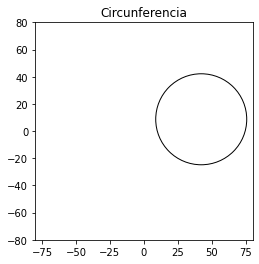

In [20]:
import haversine as hs
infile = open("p1.txt", "r")
lat=[]
lon=[]
desviacion=[]
modulofinal=[]
muestras67=[]
Rearth=6370000

for i in infile: #este bucle es solo para calcular las mean position esta vez
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC" and  valorGPS[2] == "A": ##para seguir sabiendo que es fix
             latitud = float(valorGPS[3]) #calculamos la latitud
             latgrados= int(latitud/100)
             latminimo= latitud-latgrados*100
             latfinal = latgrados + latminimo/60
             lat.append(latfinal)
              
             longitud = float(valorGPS[5])#ahora la longitud, hacemos lo mismo
             longrados=int(longitud/100)
             lonminimo=longitud-longrados*100
             lonfinal=longrados+lonminimo/60
             lon.append(lonfinal)
             
             
x=np.mean(lat)#mean position de la latitud
y=np.mean(lon)#mean position de la longitud
z=(x,y)#las dos mean position juntas
#ahora calculamos la desviación
for i in range(len(lat)):
  cordenada=(lat[i],lon[i])
  h=cordenada-x#vemos la diferencia entre cada punto y la media
  moduloh= (((h[0])**2 + (h[1]**2))**0.5)
  modulofinal.append(moduloh)
  #h.append(hf)
  #ahora calcularemos los puntos de esto que mas lejos estan de la media , esos son los que quedan fuera del circulo

lenmodulo=len(modulofinal)
ayuda=int(0.95*lenmodulo)

for i in range(ayuda):#hacemos un bucle con a longitud del 67 por ciento de las muestras, que serán los que nos quedemos
   minimo= min(modulofinal)
   modulofinal.remove(minimo)
   muestras67.append(minimo)#en este vector estan el 67 por ciento de las muestras mas pequeñas,
   #es decir, las que menos distancia tiene con la mean position
#el maximo de ese vector, será el radio que debemos usar
maximo =max(muestras67)

Circunferencia = plt.Circle((x,y), maximo, fill=False)

figure, draw = plt.subplots()
draw.set_aspect(1)
draw.cla() # clear to fresh plot

plt.title('Circunferencia')
# Set ranges
draw.set_xlim((-80, 80))
draw.set_ylim((-80, 80))

# Data comes here
draw.add_patch(Circunferencia)
figure.savefig('Circunferencia')

## Problem 2: Orbit Analysis

Generally, GPS satellites have not stationary orbits. Find in the data of the previously recorded file the information for each satellite azimuth and elevation (GSV).

**1.  Draw a polar plot of the track on the earth surface corresponding to each satellite presents during the recorded time. Label each track with the PN sequence number. Clearly explain how you have calculated the track from the satellite azimuth and elevation.**

**2. Look if there is any track showing a clear difference with the rest of the tracks. Clearly explain what is happening.**


## Resolution of Problem 2

## Problem 3: DOP analysis

As the constellation geometry respect to the receiver changes, so does the DOP. In the data file look for the ***PDOP, HDOP and VDOP values (GSA)***.

**1. Plot a graph with the temporal variation of these parameters. Look at the results and indicate if which parameter takes larger values and which one takes lower values. ¿Is there any theoretical explanation for this?**



For this exercise we will store in one variable the time extracted from GPRMC and in another variable either the PDOP, HDOP or VPOD and represent their variations.


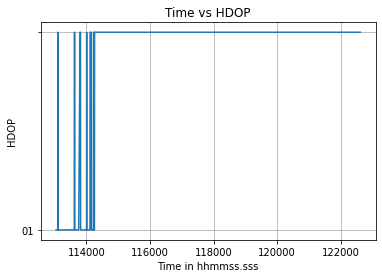

In [ ]:
infile = open("p1.txt", "r")
time= []
pdop=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC":
      tim=float(valorGPS[1])
      time.append(tim)#así calculamos los tiempos de cada satélite
  if valorGPS[0]=="$GPGSA":
      dop=valorGPS[13]
      pdop.append(dop)
      

fig, ax = plt.subplots()
ax.plot(time, pdop)
plt.ylabel('HDOP')
plt.xlabel('Time in hhmmss.sss')
plt.title("Time vs HDOP")
plt.grid()
plt.show()

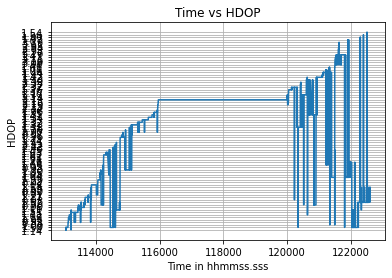

In [ ]:
infile = open("p1.txt", "r")
time= []
hdop=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC":
      tim=float(valorGPS[1])
      time.append(tim)#así calculamos los tiempos de cada satélite
  if valorGPS[0]=="$GPGSA":
      dop=valorGPS[16]
      hdop.append(dop)
fig, ax = plt.subplots()
ax.plot(time, hdop)
plt.ylabel('HDOP')
plt.xlabel('Time in hhmmss.sss')
plt.title("Time vs HDOP")
plt.grid()
plt.show()

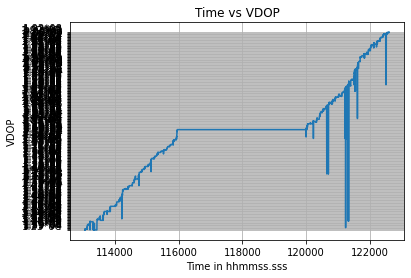

['1.23*0C\n', '1.23*0C\n', '1.59*04\n', '1.23*0C\n', '1.23*0C\n', '1.23*0C\n', '1.23*0C\n', '1.59*04\n', '1.59*04\n', '1.59*04\n', '1.23*0C\n', '1.59*04\n', '1.59*04\n', '1.59*04\n', '1.59*0E\n', '1.59*0E\n', '1.59*0E\n', '1.59*0E\n', '1.59*0E\n', '1.59*0E\n', '1.59*0E\n', '1.59*04\n', '1.59*04\n', '1.59*05\n', '1.59*04\n', '1.59*04\n', '1.59*05\n', '1.59*04\n', '1.28*08\n', '1.28*08\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.15*03\n', '1.26*0B\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.37*03\n', '1.26*0B\n', '1.37*03\n', '1.26*0B\n', '1.26*0B\n', '1.26*0B\n', '1.26*0B\n', '1.26*0B\n', '1.26*0B\n', '1.26*0B\n', '1.26*0B\n', '1.37*03\n', '1.26*0B\n', '1.37*06\n', '1.37*06\n', '1.37*06\n', '1.37*06\n', '1.37*06\n', '1.37*06\n', '1.37*06\n', '1.37*06\n', '1.26*0B\n', '1.14*02\n'

In [ ]:
infile = open("p1.txt", "r")
time= []
vdop=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPRMC":
      tim=float(valorGPS[1])
      time.append(tim)#así calculamos los tiempos de cada satélite
  if valorGPS[0]=="$GPGSA":
      dop=valorGPS[17]
      vdop.append(dop)
fig, ax = plt.subplots()
ax.plot(time, vdop)
plt.ylabel('VDOP')
plt.xlabel('Time in hhmmss.sss')
plt.title("Time vs VDOP")
plt.grid()
plt.show()


Los valores mayores los toma el HDOP y los menores los PDOP (ni siquiera varía).

 El HDOP es la variación es el valor numérico de la tasa de precisión de la posición horizontal,cuanto menor sea la variación mejor, en este caso es la más alta de las tres, así que será el indicador menos preciso.

 El PDOP es la incertidumbre debido a la posición geométrica de los satélites , al ser baja es que hay poca incertidumbre acerca de este dato.

**2. What is the minimum value for the DOP? Explain why.**

For the estimation we use the following formula: 


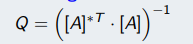

In [55]:
infile = open("p1.txt", "r")
q= []
dop=[]
for i in infile:
  valorGPS = i.split(",")
  if valorGPS[0]=="$GPGSA":
      q3=int(valorGPS[3])
      q4=int(valorGPS[4])     
      q5=int(valorGPS[5])   
      q6=int(valorGPS[6])
      q7=int(valorGPS[7])
      q8=int(valorGPS[8])
      q9=int(valorGPS[9])
      
      
         

#A=np.matrix(qmatriz[0],qmatriz[1],qmatriz[2],qmatriz[3],qmatriz[4],qmatriz[5],qmatriz[6],qmatriz[7],qmatriz[8],qmatriz[9],qmatriz[10])
#A=qmatriz[0:10]
A= np.array([[q3,q4,q5,q6,q7,q8,q9]])
Q= np.transpose(A)
x=np.dot(A,Q)
y=np.linalg.inv(x)
print(f'The minimun value for the DOP: {y}.')

The minimun value for the DOP: [[0.00025138]].


**3. Plot the Cumulative Distribution Functions of each of these parameters. Find the value of the parameters that are not exceeded 95% of the time.**